## Assignment IV
### Thinning

The purpose of this assignment is to implement thinning. There is one output for this implementation, the thinned image.

Firstly, we import the mount the google drive colab importing its related library.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Afterwards, the directory is changed to the folder in which the Test Images are stored.

In [0]:
import os
os.getcwd()
os.chdir("/content/gdrive/My Drive/BasicAlgorithmsforDigitalImaging/Lab4")

Once this is done, the next step is to import the requirements for the implementation. They are OpenCV library cv2, numpy, cv2_imshow and time library.

In [0]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import time
import matplotlib.pyplot as plt

Finally, the implementation is shown below:

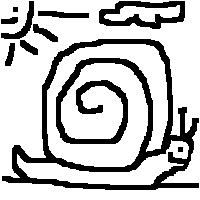

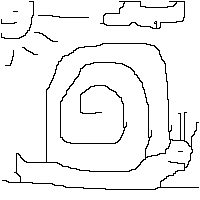

The time needed to apply thinning is 22.879061222076416 seconds.


In [29]:
np.seterr(over='ignore')

# Loads an image.
src = cv.imread("TestImages/all_png/csiga.png", cv.IMREAD_GRAYSCALE)
    
# Check if image is loaded correctly.
if src is None:
  print ('Error opening image!')  
  
else:
  # Show the source image.
  # cv2_imshow(src)
  
  # Convert the previous grayscale image into a binary one.
  ret,thresh_img = cv.threshold(src,127,255,cv.THRESH_BINARY)
  cv2_imshow(thresh_img)

  # Define row length and column length, as they will be widely used during the 
  # program.
  row_length = src.shape[0]
  col_length = src.shape[1]
  
  # Define the target image.
  target = np.zeros((row_length,col_length))
  
  ## THINNING ALGORITHM
  # Start measuring the execution time for Thinning algorithm.
  start = time.time()
  
  # Set target1 and target2 images equal to the binary image previously defined.
  target2 = thresh_img
  target1 = thresh_img
  
  # Initialize the variable n_del to a number different to zero.
  n_del = 1
  
  while n_del != 0:
    
    n_del = 0
    target1 = target2
    
    for i in range(2, src.shape[0] - 1):
      for j in range(2, src.shape[1] - 1):

        # Labelling neighbours.
        p = [target1[i-1,j], target1[i-1,j-1], target1[i,j-1], target1[i+1,j-1],
            target1[i+1,j], target1[i+1,j+1], target1[i,j+1], target1[i-1,j+1],
            target1[i-1,j]]
      
        # Labelling the upper neighbour.
        p2 = [target1[i-2,j], target1[i-2,j-1], target1[i-1,j-1], target1[i,j-1],
            target1[i,j], target1[i,j+1], target1[i-1,j+1], target1[i-2,j+1],
            target1[i-2,j]]
      
        # Labelling the left neighbour.
        p4 = [target1[i-1,j-1], target1[i-1,j-2], target1[i,j-2], target1[i+1,j-2],
            target1[i+1,j-1], target1[i+1,j], target1[i,j], target1[i-1,j],
            target1[i-1,j-1]]
      
        # Compute the non-zero neighbours. 
        nz = 0
        for k in range(8):
          if p[k] == 0:
            nz = nz + 1
      
        # Compute the number of zero to non-zero transitions of actual pixel.
        tr1 = 0
        for k in range(8):
          if p[k] == 255 and p[k+1] == 0:
            tr1 = tr1 + 1
      
        # Compute the number of zero to non-zero transitions of upper pixel.
        tr2 = 0
        for k in range(8):
          if p2[k] == 255 and p2[k+1] == 0:
            tr2 = tr2 + 1
          
        # Compute the number of zero to non-zero transitions of left pixel.
        tr4 = 0
        for k in range(8):
          if p4[k] == 255 and p4[k+1] == 0:
            tr4 = tr4 + 1
      
        # Change from object to ground the actual pixel in target2 if following
        # conditions are fulfilled.
        if (target2[i][j] == 0) and (2 <= nz <= 6) and (tr1 == 1) and (p[0] == 255 or p[2] == 255 or p[4] == 255  or tr2 != 1) and (p[0] == 255 or p[2] == 255 or p[6] == 255  or tr4 != 1):
          target2[i][j] = 255
          n_del = n_del + 1
  
  # Stop measuring the execution time for Thinning algorithm.
  last = time.time()
  
  # Show the image after applying the Thinning algorithm.
  cv2_imshow(target2)

  # Print out the execution time of the Thinning algorithm.
  print("The time needed to apply thinning is " + str(last - start) + " seconds.")